Project 1 - Applied Statistics 
            by Manojkumar Sivaraman Jan Group-3

1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats

2. Read the data as dataframe

In [2]:
ins_data=pd.read_csv('insurance.csv')

3.a Shape of the data

In [3]:
ins_data.shape

(1338, 7)

3.b Data type of each attribute

In [4]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


3.C Check the presence of missing values

In [5]:
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no nulls in the given data

3.d 5 point summary of numerical attriutes

In [6]:
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


3.e Distribution of 'bmi', 'age' and 'charges' columns

Text(0.5, 1.0, 'Charge Distribution')

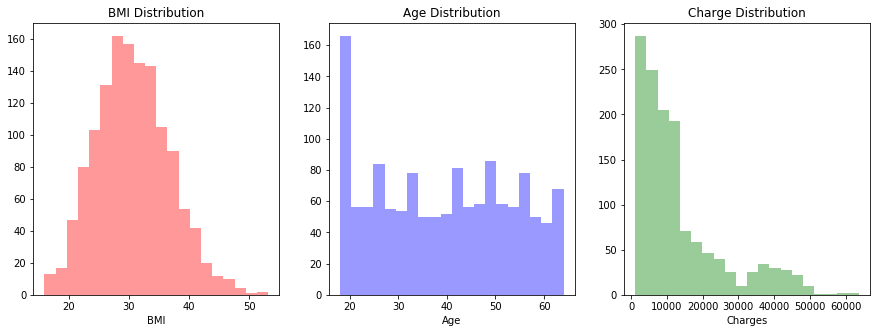

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(ins_data['bmi'],color='r',kde=False,bins=20)
plt.xlabel('BMI')
plt.title('BMI Distribution')

plt.subplot(1,3,2)
sns.distplot(ins_data['age'],color='b',kde=False,bins=20)
plt.xlabel('Age')
plt.title('Age Distribution')

plt.subplot(1,3,3)
sns.distplot(ins_data['charges'],color='g',kde=False,bins=20)
plt.xlabel('Charges')
plt.title('Charge Distribution')


BMI- Normally distributed ;           Age - Uniformly distribute  ;             Change- Right skewed

3.f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [8]:
ins_data.skew(axis=0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

3.e. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

Text(0.5, 1.0, 'Charges')

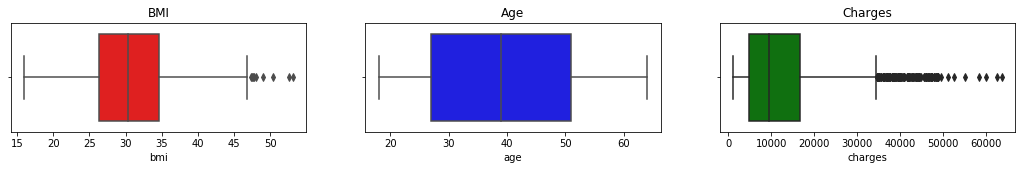

In [9]:
plt.figure(figsize=(18,2))
plt.subplot(1,3,1)
sns.boxplot(ins_data['bmi'],color='r')
plt.title('BMI')

plt.subplot(1,3,2)
sns.boxplot(ins_data['age'],color='b')
plt.title('Age')

plt.subplot(1,3,3)
sns.boxplot(ins_data['charges'],color='g')
plt.title('Charges')


Visually there are Few outliers for BMI, No outliers for Age and considerable outliers for Charges

3.h. Distribution of categorical columns (include children)

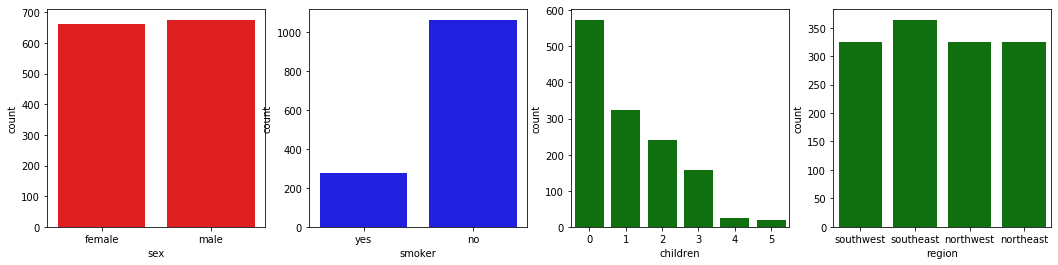

In [10]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(ins_data['sex'],color='r')

plt.subplot(1,4,2)
sns.countplot(ins_data['smoker'],color='b')

plt.subplot(1,4,3)
sns.countplot(ins_data['children'],color='g')

plt.subplot(1,4,4)
sns.countplot(ins_data['region'],color='g')


Looks like the male to female ratio is almost equal in the total population in which non smokers are much more in count than smokers. People with no children are more in number and the population is equally populated except in Southeast which slightly has more population than the other parts 

3.i. Pair plot that includes all the columns of the data frame

In [11]:
ins_data_cat=ins_data.copy()

In [12]:
ins_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
dmap1={'male':0,'female':1}
dmap2={'yes':0,'no':1}
dmap3={'southwest':0,'southeast':1,'northwest':2,'northeast':3}
ins_data_cat['sex'] = ins_data_cat['sex'].map(dmap1)
ins_data_cat['smoker'] = ins_data_cat['smoker'].map(dmap2)
ins_data_cat['region'] = ins_data_cat['region'].map(dmap3)

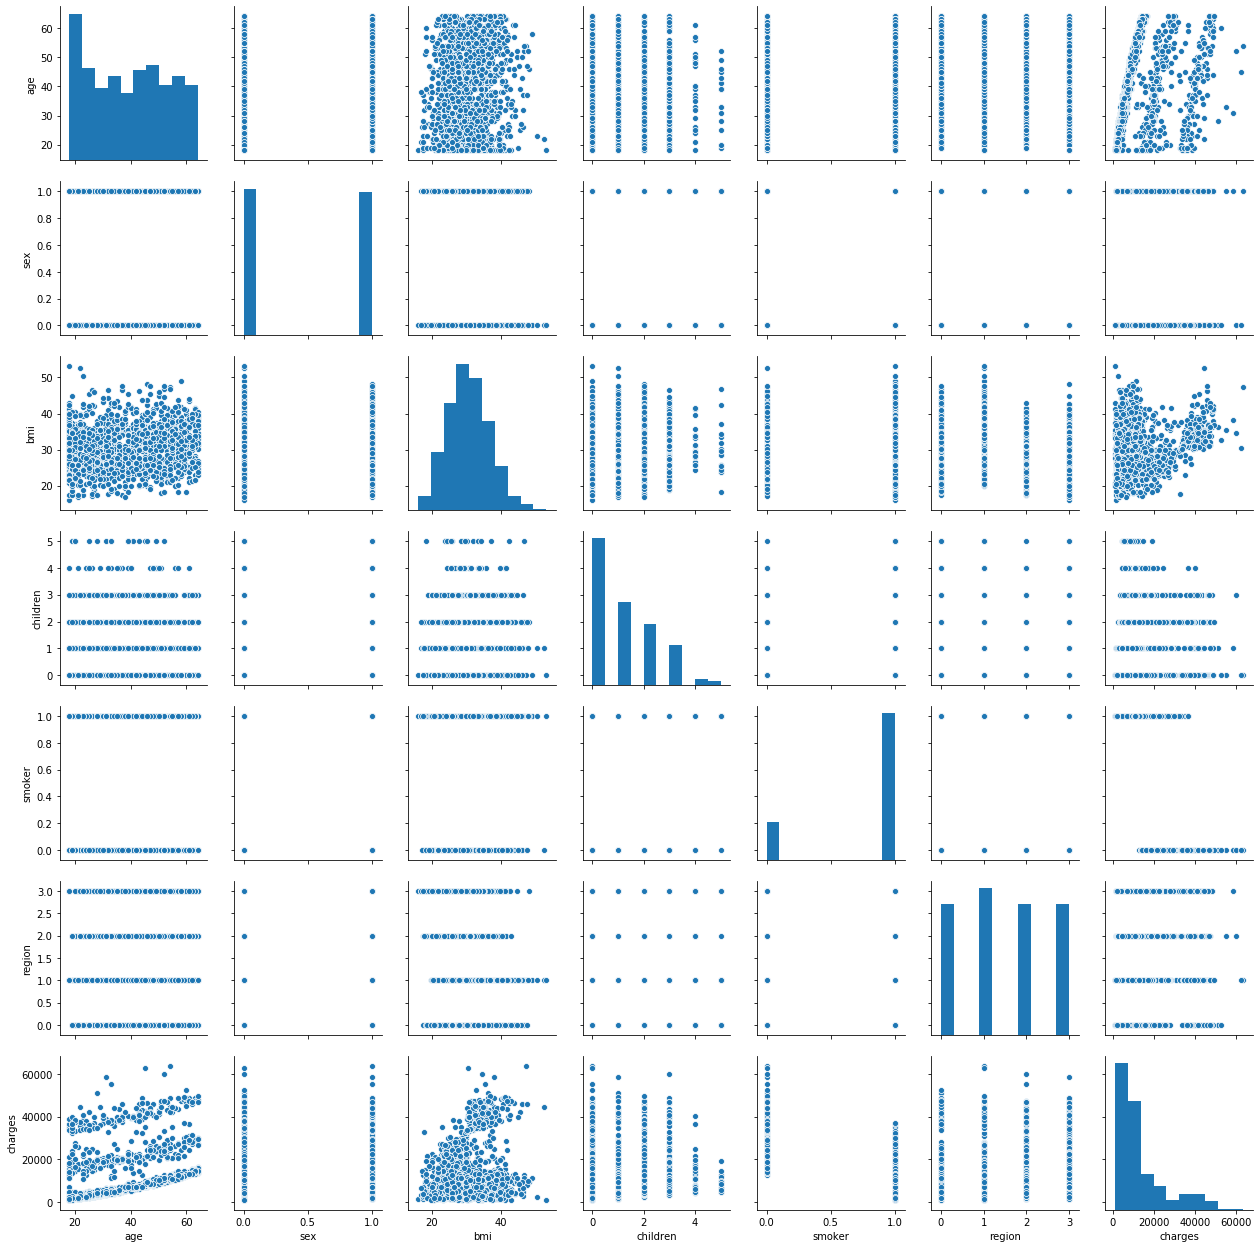

In [14]:
sns.pairplot(ins_data_cat)

4.a. Do charges of people who smoke differ significantly from the people who
don't?

In [15]:
x= ins_data[ins_data['smoker']=='yes']['charges']
y= ins_data[ins_data['smoker']=='no']['charges']
#setting the null hypothesis and alternate hypothesis
#Null Hypothesis -  There is no impact on charges between smokers and non-smokers
#Alternate Hypothesis -  There is impact on charges between smokers and non-smokers
#Using independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)
print('t= ',{t},'P-Value = ',{p_value})

t=  {46.664921172723716} P-Value =  {8.271435842177219e-283}


Since P-value is very less than 0.05, we reject the Null Hypothesis and hence there is a significant impact on the charges for the smokers than non smokers 

4.b. Does bmi of males differ significantly from that of females?

In [16]:
m= ins_data[ins_data['sex']=='male']['bmi']
f= ins_data[ins_data['sex']=='female']['bmi']
#setting the null hypothesis and alternate hypothesis
#Null Hypothesis -  There is no difference in BMI of males from that of female
#Alternate Hypothesis -  There is differences in BMI of males from that of female
#Using independent t-test
t, p_value  = stats.ttest_ind(m,f, axis = 0)
print('t= ',{t},'P-Value = ',{p_value})

t=  {1.696752635752224} P-Value =  {0.08997637178984932}


Since P-value is greater than 0.05, we FAIL to reject the Null Hypothesis and hence there is a no difference in the BMI of males than that of BMI of females 

4.c Is the proportion of smokers significantly different in different genders?

Since the comparasion is between the categorical variable, we go for a Chi square test

Null Hypothesis: There is no significant difference in somkers within gender

Alternate Hypothesis: There is significant difference in somkers within gender

In [22]:
#Converting the categorical variables into a table
cat_tab=pd.crosstab(ins_data['sex'],ins_data['smoker'])
cat_tab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [23]:
chi, p_value, dof, expected =  stats.chi2_contingency(cat_tab)
print('Chi value= ',{chi},'P-Value= ',{p_value})

Chi value=  {7.39291081459996} P-Value=  {0.006548143503580696}


Since p-value is 0.00655 < 0.05 we reject the null hypothesis. So there is significant difference in somkers within gender

4.d.Is the distribution of bmi across women with no children, one child and
two children, the same?

Since the ratio of categorical values(women with children and women without children) needs to be compared with the BMI, we go for a F-Test for this distribution

Null Hypothesis: There is no difference of BMI accross women with no children,one child and two children
    
Alternate Hypothesis: There is difference of BMI accross women with no children,one child and two children

In [35]:
#Spllitting the data based on the kids
no_children= ins_data[(ins_data['sex']=='female') & (ins_data['children']==0)]['bmi']
one_child= ins_data[(ins_data['sex']=='female') & (ins_data['children']==1)]['bmi']
two_children= ins_data[(ins_data['sex']=='female') & (ins_data['children']==2)]['bmi']

In [37]:
#performing F-test on the above value
f_stat, p_value = stats.f_oneway(no_children,one_child,two_children)
print('F-Value = ',{f_stat},'P-Value = ',{p_value})

F-Value =  {0.3344720147757968} P-Value =  {0.7158579926754841}


Since p_value is greater than 0.05, we fail to reject the null hypothesis. Hence There is no difference of BMI accross women with no children,one child and two children